# Procesy stabilne Levy'ego

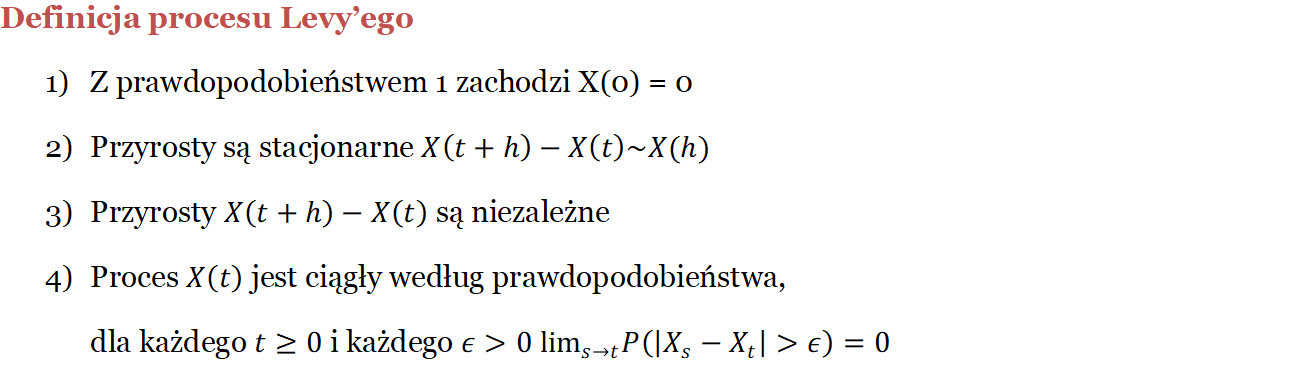

Proces Lévy'ego jest procesem stochastycznym, który jest naturalnym uogólnieniem procesu Wienera (ruchu Browna) i procesu Poissona. Proces Lévy'ego jest procesem stochastycznym z "ciężkimi ogonami", co oznacza, że ma on wysokie prawdopodobieństwo dużych skoków.

W każdej chwili generowany jest skok, którego wartość bazuje na rozkładzie normalnym.

## Parametry generacji trajektorii
alpha - parametr stabilności. Wartość między należy do (0;2]. Im bliżej 2 jest wartość tym bardziej stabilny jest proces co oznacza mniej gwałtownych skoków.

beta - parametr asymetrii. Przyjmuje wartości w zakresie [-1;1], które wpływają na wartości losowanych skoków.

drift - parametr dryfu. Przyjmuje wartości w zakresie [-1;1]. Wartość ta oznacza przesunięcie każdego ze skoków o określoną wartość.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_levy_trajectory(n, alpha, beta, drift=0):
    """
    Generuje trajektorię procesu Lévy'ego.
    
    :param n: Liczba kroków.
    :param alpha: Parametr skali (stabilności), 0 < alpha <= 2.
    :param beta: Parametr asymetrii, -1 <= beta <= 1.
    :param drift: Parametr dryfu, -1 <= drift <= 1.
    :return: Trajektoria procesu Lévy'ego w postaci pandas DataFrame.
    """
    if not (0 < alpha <= 2):
        raise ValueError("Parametr alpha musi być w zakresie (0, 2].")

    if not (-1 <= beta <= 1):
        raise ValueError("Parametr beta musi być w zakresie [-1, 1].")

    if not (-1 <= drift <= 1):
        raise ValueError("Parametr drift musi być w zakresie [-1, 1].")

    # Generowanie skoków z rozkładu Lévy'ego
    sigma = (1 - beta ** 2) ** (1 / (2 * alpha))
    uniform_randoms = np.random.uniform(-np.pi / 2, np.pi / 2, n)
    exponential_randoms = np.random.exponential(scale=(1 / alpha), size=n)
    jumps = sigma * np.tan(alpha * uniform_randoms) + beta * sigma * \
            (np.cos(alpha * uniform_randoms) - 1) / np.cos(uniform_randoms) / exponential_randoms

    #dodanie dryfu 
    jumps += (drift/1000) * np.arange(n)
    
    # Sumowanie skoków do utworzenia trajektorii
    trajectory = np.cumsum(jumps)

    return trajectory

def plot_levy_trajectory(t,x):
    plt.plot(t, x)
    plt.title('Trajektoria procesu Lévy\'ego')
    plt.xlabel('t')
    plt.ylabel('L(t)')
    plt.grid(True)
    plt.show()

def plot_levy_trajectory_3D(t,x,y):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(t, x, y)
    ax.set_xlabel('t')
    ax.set_ylabel('LX(t)')
    ax.set_zlabel('LY(t)')
    ax.set_title('Trajektoria procesu Lévy\'ego 3D')
    plt.grid(True)
    plt.show()
    return

## Przykładowe trajketorie procesów Levy'ego

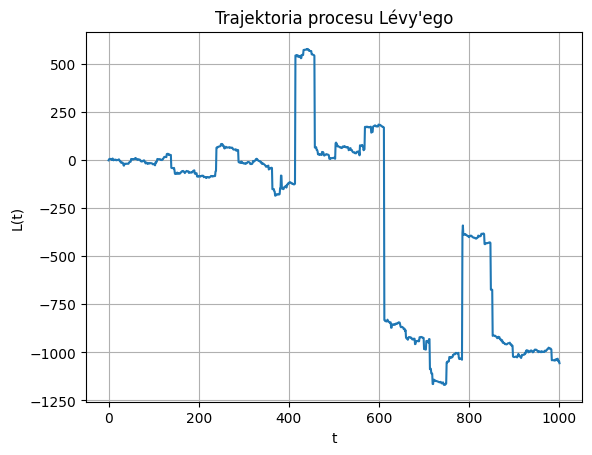

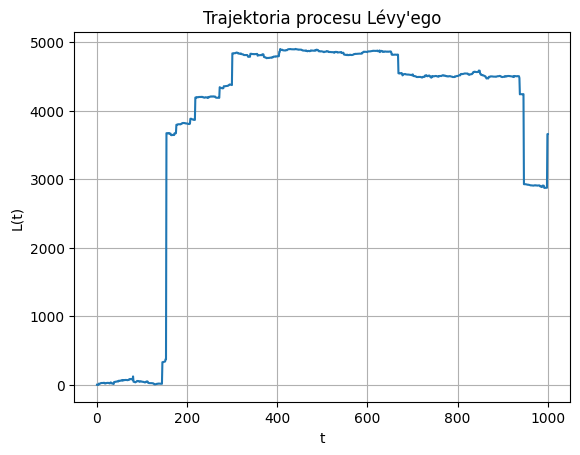

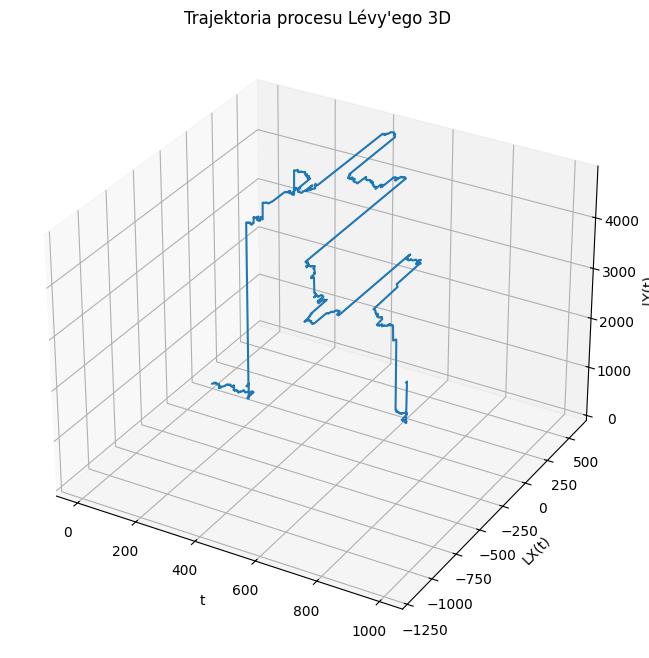

In [17]:
# parametry trajektorii
n = 1000

alpha1 = 1.5
beta1 = 0
drift1 = 0

alpha2 = 1.5
beta2 = 0
drift2 = 0

x = generate_levy_trajectory(n, alpha1, beta1, drift1)
y = generate_levy_trajectory(n, alpha2, beta2, drift2)
t = np.linspace(0, n, n)


# Narysuj wykres
plot_levy_trajectory(t,x)
plot_levy_trajectory(t,y)
plot_levy_trajectory_3D(t,x,y)

## Obliczanie wymiaru Mikowskiego (boxowego)

In [2]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

def plot_reg(logs, logN, slope, intercept):
    
    # Rysowanie punktów
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    # Rysowanie linii regresji
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title('Regresja liniowa dla wymiaru boxowego')
    plt.show()

def compute_box_dimension(X, epsilons, plot):
    """
    Oblicza wymiar boxoswy dla zadanej trajektorii.
    
    :param X: kolejne wartości punktów trajektorii.
    :param epsilons: długości podziałów w kolejnych krokach.
    :param plot: parametr określający, czy funkcja powinna rysować wykres.
    :return: wartość obliczonego wymiaru.
    """
    counts = []
    eps = []
    
    for epsilon in epsilons:
        intervals = int(1 / epsilon)
        n_points = int(len(X)/intervals)
        count = 0

        for i in range(int(intervals)):
            in_range = int((np.max(X[i*n_points:(i+1)*n_points-1]) - np.min(X[i*n_points:(i+1)*n_points-1])) / epsilon)
            count += in_range

        if count > 0:
            counts.append(count)
            eps.append(epsilon)

    logs = np.log(1/np.array(eps))
    logN = np.log(counts)

    if logs.size == 0:
        return 0
        
    slope, intercept, _, _, _ = linregress(logs, logN)
    
    if plot:
        plot_reg(logs, logN, slope, intercept)
    
    return slope

def compute_box_dimension_3D(X, Y, epsilons, plot):
    """
    Oblicza wymiar boxoswy dla zadanej trajektorii 3D.
    
    :param X: kolejne wartości pierwszej współrzędnej punktów trajektorii.
    :param Y: kolejne wartości drugiej współrzędnej punktów trajektorii.
    :param epsilons: długości podziałów w kolejnych krokach.
    :param plot: parametr określający, czy funkcja powinna rysować wykres.
    :return: wartość obliczonego wymiaru.
    """
    counts = []
    eps = []
    
    for epsilon in epsilons:
        intervals = int(1 / epsilon)
        n_points = int(len(X)/intervals)
        count = 0

        for i in range(int(intervals)):
            in_range_X = int((np.max(X[i*n_points:(i+1)*n_points-1]) - np.min(X[i*n_points:(i+1)*n_points-1])) / epsilon)
            in_range_Y = int((np.max(Y[i*n_points:(i+1)*n_points-1]) - np.min(Y[i*n_points:(i+1)*n_points-1])) / epsilon)
            count += (in_range_X * in_range_Y)

        if count > 0:
            counts.append(count)
            eps.append(epsilon)

    logs = np.log(1/np.array(eps))
    logN = np.log(counts)

    if logs.size == 0:
        return 0
        
    slope, intercept, _, _, _ = linregress(logs, logN)
    
    if plot:
        plot_reg(logs, logN, slope, intercept)
    
    return slope

Wymiar zostanie wyznaczony doświadczalnie poprzeaz zliczenie potrzebnych do pokrycia krzywej obszarów. Rozmiary kolejnych obszarów określa ciąg malejących epsilonów:

In [3]:
# Definiowanie zakresu epsilonów
# epsilony do liczenia wymiaru boxowego
epsilons = []

for i in range(8):
    epsilons = epsilons + [(1/(2**i))]

print(epsilons)

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]


Generowane są nowe trajektorie i na podstawie zadanych epsilonów obliczny jest ich wymiar:

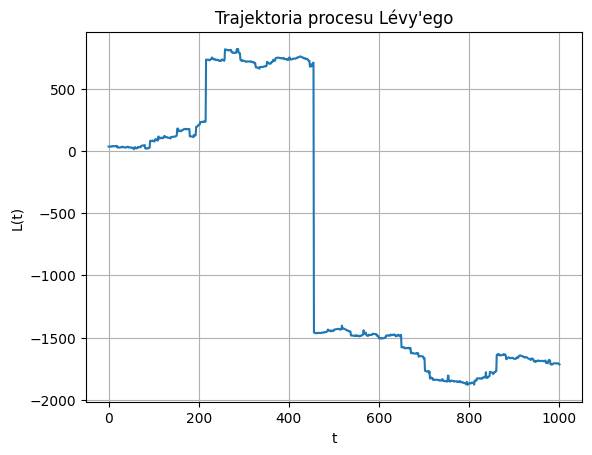

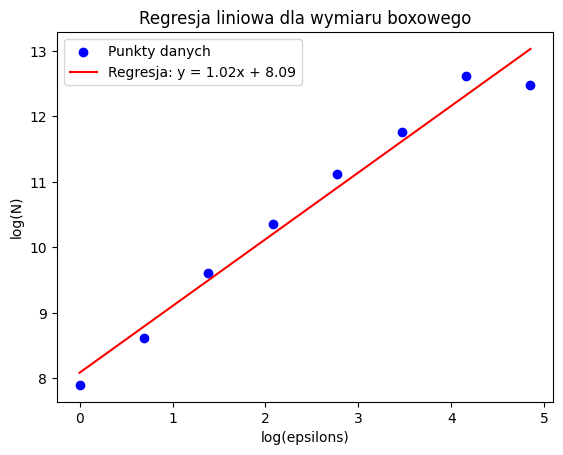

Wymiar boxowy: 1.018942113678191


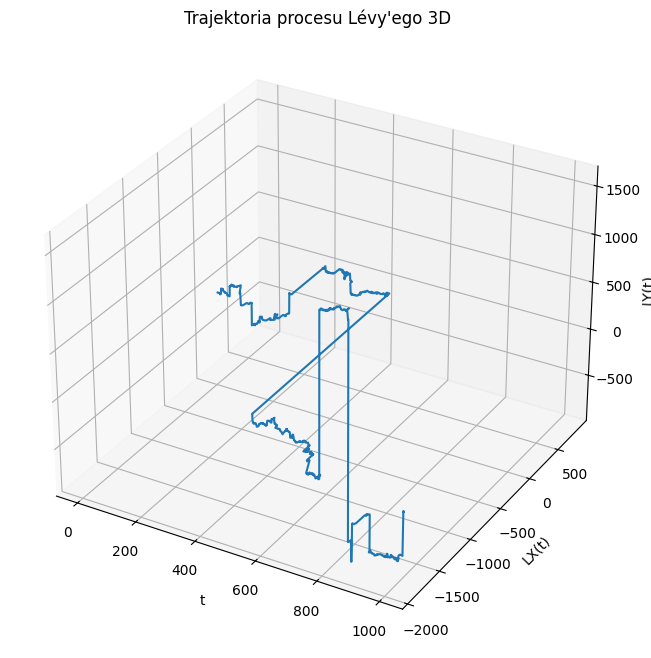

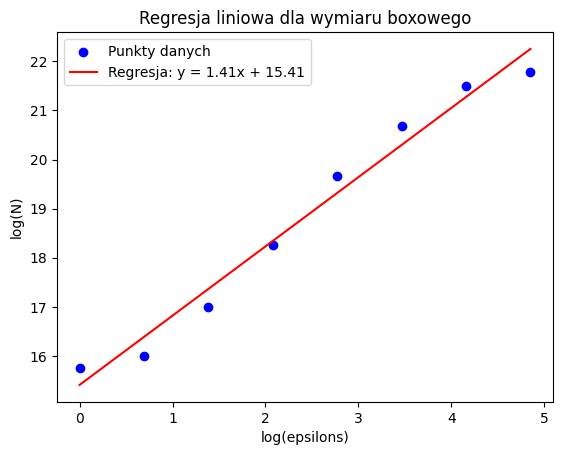

Wymiar boxowy 3D: 1.410863985998407


In [22]:
# parametry trajektorii Levy'ego
n = 1000
alpha = 1.5
beta = 0
drift = 0

# generacja trajektorii
x = generate_levy_trajectory(n, alpha, beta, drift)
t = np.linspace(0, n, n)
plot_levy_trajectory(t,x)
# obliczenie wymiaru boxowego
dimension = compute_box_dimension(x, epsilons, True)
print("Wymiar boxowy:", dimension)

# generacja drugiej trajektorii
y = generate_levy_trajectory(n, alpha, beta, drift)
plot_levy_trajectory_3D(t,x,y)
# obliczenie wymiaru boxowego dal trajektorii 3D
dimension = compute_box_dimension_3D(x, y, epsilons, True)
print("Wymiar boxowy 3D:", dimension)

## Badanie zależności wymairu boxowego od parametrów trajektorii

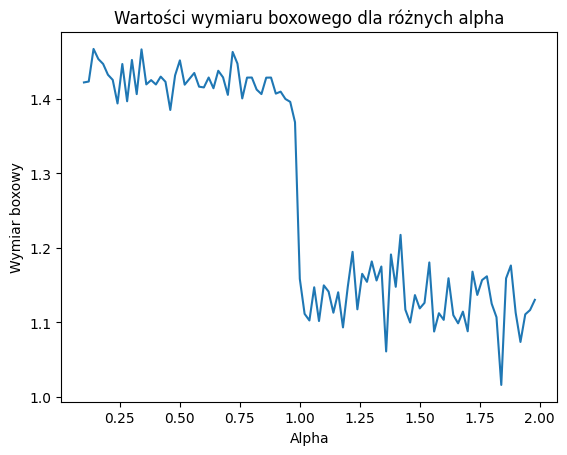

In [7]:
# obliczanie wymiaru boxowego dla różnych wielkości alfa
alphas = numbers_array = np.arange(0.1, 2, 0.02)
np.set_printoptions(suppress=True)
beta=0
dims = []
n=1000
t = np.linspace(0, n, n)
for alpha in alphas:
    dims_for_alpha = []
    for i in range(10):
        x = generate_levy_trajectory(n, alpha, beta);
        dimension = compute_box_dimension(x, epsilons, False)
        dims_for_alpha = dims_for_alpha + [dimension]
    dims = dims + [np.mean(dims_for_alpha)]

plt.plot(alphas, dims)
plt.title('Wartości wymiaru boxowego dla różnych alpha')
plt.xlabel('Alpha')
plt.ylabel('Wymiar boxowy')
plt.show()

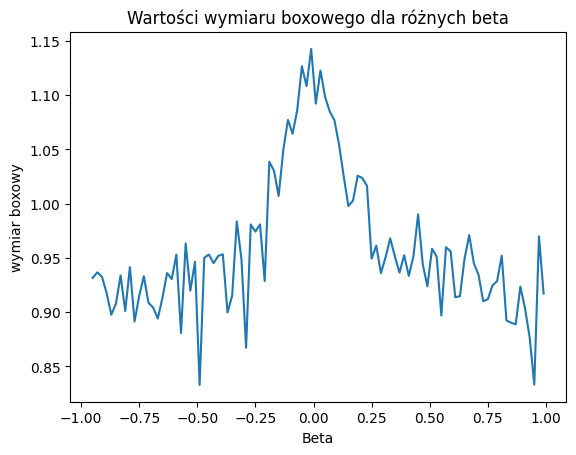

In [23]:
# obliczanie wymiaru boxowego dla różnych wielkości beta
betas = np.arange(-0.95, 1, 0.02)
np.set_printoptions(suppress=True)
alpha = 1
dims = []
n = 1000
t = np.linspace(0, n, n)
for beta in betas:
    dims_for_beta = []
    for i in range(10):
        x = generate_levy_trajectory(n, alpha, beta);
        dimension = compute_box_dimension(x, epsilons, False)
        dims_for_beta = dims_for_beta + [dimension]
    dims = dims + [np.mean(dims_for_beta)]

plt.plot(betas, dims)
plt.title('Wartości wymiaru boxowego dla różnych beta')
plt.xlabel('Beta')
plt.ylabel('wymiar boxowy')
plt.show()

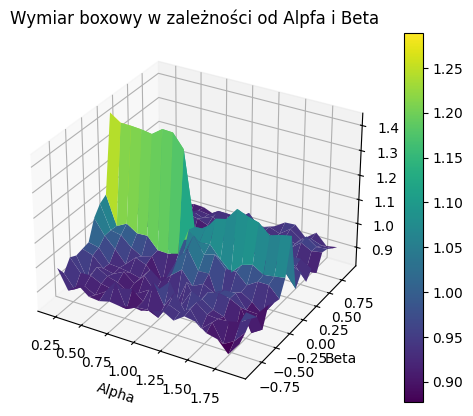

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
alphas = numbers_array = np.arange(0.2, 2, 0.1)
betas = np.arange(-0.90, 1, 0.1)
n = 1000
dims = []
t = np.linspace(0, n, n)
for beta in betas:
    dims_for_beta = []
    for alpha in alphas:
        dims_for_alpha = []
        for i in range(10):
            x = generate_levy_trajectory(n, alpha, beta);
            dimension = compute_box_dimension(x, epsilons, False)
            dims_for_alpha = dims_for_alpha + [dimension]
        mean = np.mean(dims_for_alpha)
        dims_for_beta = dims_for_beta + [mean]
    dims = dims + [dims_for_beta]
    
alphas = np.array(alphas)
betas = np.array(betas)
dims = np.array(dims)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alphas_mesh, betas_mesh = np.meshgrid(alphas, betas)

surf = ax.plot_surface(alphas_mesh, betas_mesh, dims, cmap='viridis')

ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Wymiar boxowy')
ax.set_title('Wymiar boxowy w zależności od Alpfa i Beta')

fig.colorbar(surf, ax=ax, orientation='vertical')
plt.show()

# Zastosowania procesów Levy'ego

Peocesy Levy'ego znajdują zastosowanie w wielu dziedzinach nauki i biznesu:
- ***Finanse*** - Procesy Levy'ego stanowią podstawę wielu modeli służacych do analizy cen aktywów finansowych, zmienności rynków, czy wyceny opcji i ryzyka. Modele wykorzystujące procesy Levy'ego, takie jak modele dyfuzji skokowej stanowią rozszerzenie klasycznym modeli, takich jak model Black-Scholes wykorzystujący normalne ruchy Browna i lepiej oddają rzeczywisty obraz aktywności rynkowej.

- ***Biologia*** -  Procesy Levy'ego stosowane są w modelowaniu migracji zwierząt, które czasami wykonują długie przemieszczenia w ramach swojego normalnego zachowania podczas poszukiwania pożywienia.

- ***Statystyka i Analiza Danych*** - Są używane w zaawansowanej analizie danych i statystyce do modelowania danych z ciężkimi ogonami rozkładu, które nie pasują do standardowych modeli.

- ***Informatyka i Sieci Komputerowe*** - Stosowane są do modelowania ruchu w sieciach komputerowych i systemach telekomunikacyjnych, gdzie mogą występować nagłe wzrosty ruchu.

- ***Fizyka*** - Są używane do modelowania różnych zjawisk, w tym dyfuzji anomalnej, gdzie cząsteczki poruszają się w sposób niestandardowy, na przykład w złożonych środowiskach, takich jak płyny biologiczne czy sieci porowate.

- ***Nauki o Środowisku i Geofizyka*** - Stosuje się je do modelowania zjawisk takich jak rozprzestrzenianie się zanieczyszczeń w środowisku czy ruchów sejsmicznych.

## Model dyfuzji skoków Mertona (Merton's Jump Difiussion Model)

Model dyfuzji skoków Mertona stanowi rozszerzenie popularnego modelu analizy cen aktywów finansowych: modelu Black-Scholes. Główną wadą modelu BS jest fakt, że jego symulacja oparta jest na geometrycznych ruchach Browna, a więc zakłada, że Volatility jest stałe, co w rzeczywistości nie zawsze jest prawdą. Zdarzenia takie jak bankructwa róznych przedsiębiorstw, wydarzenia polityczne czy inne zewnętrze czynniki mogą drastycznie wpływać na wartość akcji, co powoduje nagłe skoki widoczne na wykresach ich kursu. Aby uwzględnić te nagłe, gwałtowne zmiany powstał Nodel Mertona oparty na procesach Levy'ego.

Model ten wyróżnia dwa warianty zmian w ceniach akcji:
1. ***Wibracje normalne*** - reprezentowane proprzez ruch Browna (analogiczne do modelu BS)
2. ***Wibracjie abnormalne*** - zmiany nieciągłe, cechujące się dużymi, nagłymi skokami (niemożliwe do reprezentacji za pomocą ruchu Browna)

Aby być w stanie rperezentować obydwa rodzaje zmian model wykorzystuje procesy Levy'ego, które są uogólnieniem ruchów Browna i pozawlają na symulację częstych dużych skoków.

### Rozwiązanie monte carlo


Text(0.5, 1.0, 'Jump Diffusion Process')

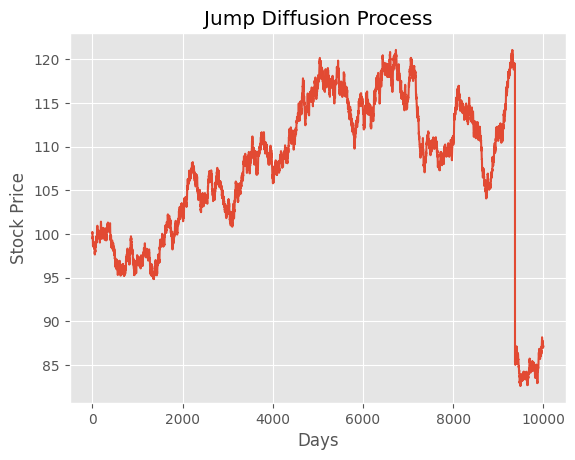

In [25]:
plt.style.use('ggplot')

def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =10000 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

### Rozwiązanie alternawyne (Closed Form Solution)

In [26]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar   
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    

def merton_jump_call(S, K, T, r, sigma, m , v, lam):
    p = 0
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k)
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))  * BS_CALL(S, K, T, r_k, sigma_k)
    
    return p 


def merton_jump_put(S, K, T, r, sigma, m , v, lam):
    p = 0 # price of option
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k) # 
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact)) \
                    * BS_PUT(S, K, T, r_k, sigma_k)
    return p 

### Porównanie obydwu metod do metody Black Scholes

In [27]:
S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam = 1 # intensity of jump i.e. number of jumps per annum
steps =255 # time steps
Npaths =200000 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process
K =100
np.random.seed(3)
j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths) #generate jump diffusion paths

mcprice = np.maximum(j[-1]-K,0).mean() * np.exp(-r*T) # calculate value of call

cf_price =  merton_jump_call(S, K, T, r, sigma, np.exp(m+v**2*0.5) , v, lam)

print('Merton Price =', cf_price)
print('Monte Carlo Merton Price =', mcprice)
print('Black Scholes Price =', BS_CALL(S,K,T,r, sigma))

#Merton Price = 14.500570058304778
#Monte Carlo Merton Price = 14.597509592911369
#Black Scholes Price = 8.916037278572539

Merton Price = 14.500570058304778
Monte Carlo Merton Price = 14.597509592911369
Black Scholes Price = 8.916037278572539


C:\Users\karol\AppData\Local\Temp\ipykernel_12012\2592729197.py:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  k_fact = np.math.factorial(k)
